In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
import xgboost 
from sklearn.ensemble import GradientBoostingRegressor as GBR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_scaled = pd.read_csv('x_scaler_ver2.csv')

In [3]:
df_all = pd.read_csv('final_df_all_ver0.4.csv')

In [4]:
df_rate = df_all[['del_rate']]

In [6]:
df = pd.concat([df_scaled, df_rate], axis=1)

In [7]:
df.drop('chaju_id',axis=1,inplace=True)

In [8]:
df_raw_y = df['del_rate']
df_raw_x = df.drop('del_rate',axis=1,inplace=False)

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_test_y.shape))

train data x size:(1000, 14)
train data y size:(1000,)
test data x size:(429, 14)
test data y size:(429,)


In [10]:
gb_uncustomized = GBR()
gb_uncustomized.fit(df_train_x, df_train_y)
#train data 설명력
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
#test data 설명력
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.991
Score on test set:0.943


In [12]:
v_feature_name = df_train_x.columns

df_importance= pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_uncustomized.feature_importances_

df_importance.sort_values('Importance',ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,over_period,0.599
1,over_amt,0.209
3,loan_count,0.079
5,loan_period,0.054
4,loan_amt_final2,0.051
0,overdue_count,0.003
7,age,0.002
6,card_period,0.001
9,income_home_grp,0.000
8,house_type,0.000


Text(0, 0.5, 'feature')

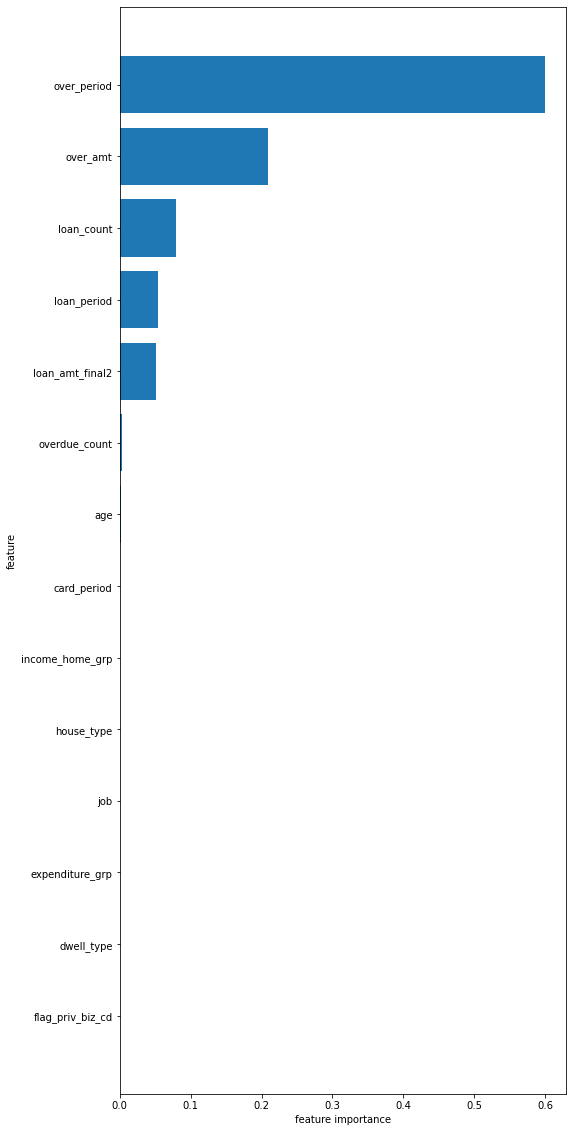

In [13]:
plt.figure(figsize=(8,20))
df_importance.sort_values('Importance',ascending=True, inplace =True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('feature importance')
plt.ylabel('feature')


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score

In [17]:
nn_uncustomized =MLPRegressor(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.513
Accuracy on test set:0.483


In [22]:
models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

In [26]:
for m in models:
    m.fit(df_train_x, df_train_y)
    print(m.__class__)
    print(r2_score(df_train_y, m.predict(df_train_x)))
    print(r2_score(df_test_y, m.predict(df_test_x)))

<class 'sklearn.linear_model._base.LinearRegression'>
0.5284948800594986
0.4259441229113381
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.7385918117881713
0.7250164411806744
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9738429454616501
0.9474312194818885
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9745908936639931
0.9101703375673796
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9797166181081217
0.9194043235088898
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
-1.5206441575044138e-05
-0.002719400611624234
